## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Data Preprocessing

### Training Image Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Plant_Disease_Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Plant_Disease_Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[149.5  152.5  157.5 ]
   [155.5  158.5  163.5 ]
   [148.5  151.5  156.5 ]
   ...
   [139.   137.   140.  ]
   [135.5  133.5  136.5 ]
   [145.25 143.25 146.25]]

  [[152.5  155.5  160.5 ]
   [157.75 160.75 165.75]
   [151.25 154.25 159.25]
   ...
   [144.5  139.5  143.5 ]
   [138.   133.   137.  ]
   [132.5  127.5  131.5 ]]

  [[154.   157.   162.  ]
   [154.   157.   162.  ]
   [147.5  150.5  155.5 ]
   ...
   [142.   138.   139.  ]
   [131.5  127.5  128.5 ]
   [128.25 124.25 125.25]]

  ...

  [[160.25 168.25 179.25]
   [162.   170.   181.  ]
   [157.5  165.5  176.5 ]
   ...
   [128.   132.   143.  ]
   [129.25 133.25 144.25]
   [118.5  122.5  133.5 ]]

  [[156.5  164.5  175.5 ]
   [158.25 166.25 177.25]
   [157.5  165.5  176.5 ]
   ...
   [125.25 129.25 140.25]
   [120.5  124.5  135.5 ]
   [125.25 129.25 140.25]]

  [[152.5  160.5  171.5 ]
   [153.75 161.75 172.75]
   [153.5  161.5  172.5 ]
   ...
   [123.25 127.25 138.25]
   [134.   138.   149.  ]
   [121.25 125.25 13

## Building Model

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

## Building Convolution Layer

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

c:\Users\akash\anaconda3\envs\plantenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [22]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 957s 435ms/step - accuracy: 0.3957 - loss: 2.1666 - val_accuracy: 0.8373 - val_loss: 0.5201
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1022s 465ms/step - accuracy: 0.8320 - loss: 0.5373 - val_accuracy: 0.8971 - val_loss: 0.3280
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1093s 498ms/step - accuracy: 0.8982 - loss: 0.3204 - val_accuracy: 0.9290 - val_loss: 0.2251
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1044s 475ms/step - accuracy: 0.9351 - loss: 0.2010 - val_accuracy: 0.9485 - val_loss: 0.1570
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1059s 482ms/step - accuracy: 0.9503 - loss: 0.1485 - val_accuracy: 0.9409 - val_loss: 0.2005
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1084s 494ms/step - accuracy: 0.9631 - loss: 0.1136 - val_accuracy: 0.9392 - val_loss: 0.1999
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 971s 442ms/step - accuracy: 0.9682 - loss: 0.0977 - val_accuracy: 0.9482 - val_loss: 0.1794
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 987s 449ms/step

## Model Evaluation

In [23]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 358s 163ms/step - accuracy: 0.9864 - loss: 0.0416


In [24]:
print(train_loss,train_acc)

0.038153551518917084 0.9876662492752075


In [25]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 88s 159ms/step - accuracy: 0.9631 - loss: 0.1367


In [26]:
print(val_loss,val_acc)

0.14096324145793915 0.9613020420074463


### Saving Model

In [27]:
model.save("trained_model.keras")

In [28]:
training_history.history

{'accuracy': [0.5931004881858826,
  0.8578277230262756,
  0.9100362658500671,
  0.9397538900375366,
  0.9539796710014343,
  0.9649477005004883,
  0.9702112674713135,
  0.9767408967018127,
  0.9788604974746704,
  0.9800554513931274],
 'loss': [1.3928568363189697,
  0.4543558359146118,
  0.27878981828689575,
  0.18613696098327637,
  0.13893401622772217,
  0.10723468661308289,
  0.09127107262611389,
  0.0728449672460556,
  0.06589099764823914,
  0.05998656153678894],
 'val_accuracy': [0.8372979760169983,
  0.8970521092414856,
  0.928977906703949,
  0.9484975934028625,
  0.9408718347549438,
  0.9392215013504028,
  0.9482130408287048,
  0.9682449102401733,
  0.9660823941230774,
  0.9613020420074463],
 'val_loss': [0.5201117396354675,
  0.3280186355113983,
  0.22505244612693787,
  0.15700100362300873,
  0.20054207742214203,
  0.1999080926179886,
  0.17939075827598572,
  0.10681847482919693,
  0.11465010792016983,
  0.14096328616142273]}

In [29]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [30]:
training_history.history['val_accuracy']

[0.8372979760169983,
 0.8970521092414856,
 0.928977906703949,
 0.9484975934028625,
 0.9408718347549438,
 0.9392215013504028,
 0.9482130408287048,
 0.9682449102401733,
 0.9660823941230774,
 0.9613020420074463]

### Accuracy Visualization

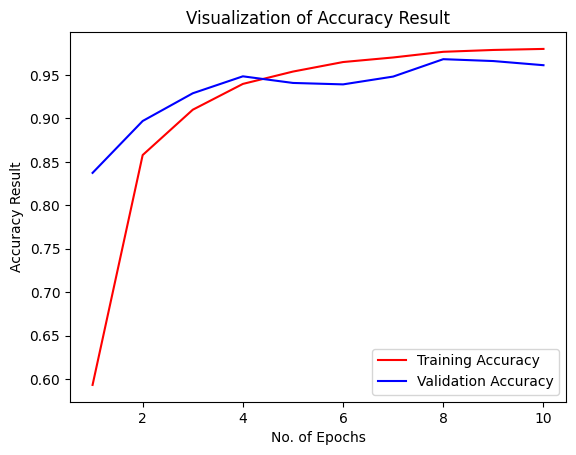

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [32]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Plant_Disease_Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [35]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 65s 119ms/step


(array([[9.9999285e-01, 3.3782758e-08, 8.0681309e-11, ..., 1.6603923e-15,
         1.0089212e-14, 2.8011095e-13],
        [9.9994981e-01, 1.8103673e-08, 7.7763795e-09, ..., 4.5861513e-13,
         2.4102505e-13, 4.4906117e-11],
        [1.0000000e+00, 4.3651416e-10, 8.9266518e-11, ..., 5.8754850e-18,
         6.3610930e-16, 3.6297584e-14],
        ...,
        [2.2733193e-12, 4.0579917e-15, 6.9558009e-10, ..., 7.0709728e-14,
         1.1600082e-13, 1.0000000e+00],
        [4.6087467e-11, 1.9643027e-13, 5.6988911e-09, ..., 1.3606634e-10,
         2.3664275e-11, 9.9999976e-01],
        [2.3825294e-18, 2.2244727e-20, 3.7251834e-17, ..., 1.3799223e-19,
         1.6546549e-17, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [36]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [37]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [38]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [44]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.94      0.95       504
                                 Apple___Black_rot       1.00      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.93      1.00      0.97       440
                                   Apple___healthy       0.95      0.97      0.96       502
                               Blueberry___healthy       0.97      0.96      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.93      1.00      0.96       421
                 Cherry_(including_sour)___healthy       0.96      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.88      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.98      0.

In [42]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[472,   2,   1, ...,   0,   0,   0],
       [  3, 480,   4, ...,   0,   0,   0],
       [  0,   0, 440, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 488,   0,   0],
       [  1,   0,   1, ...,   0, 439,   0],
       [  0,   0,   3, ...,   0,   0, 472]])

### Confusion Matrix Visualization

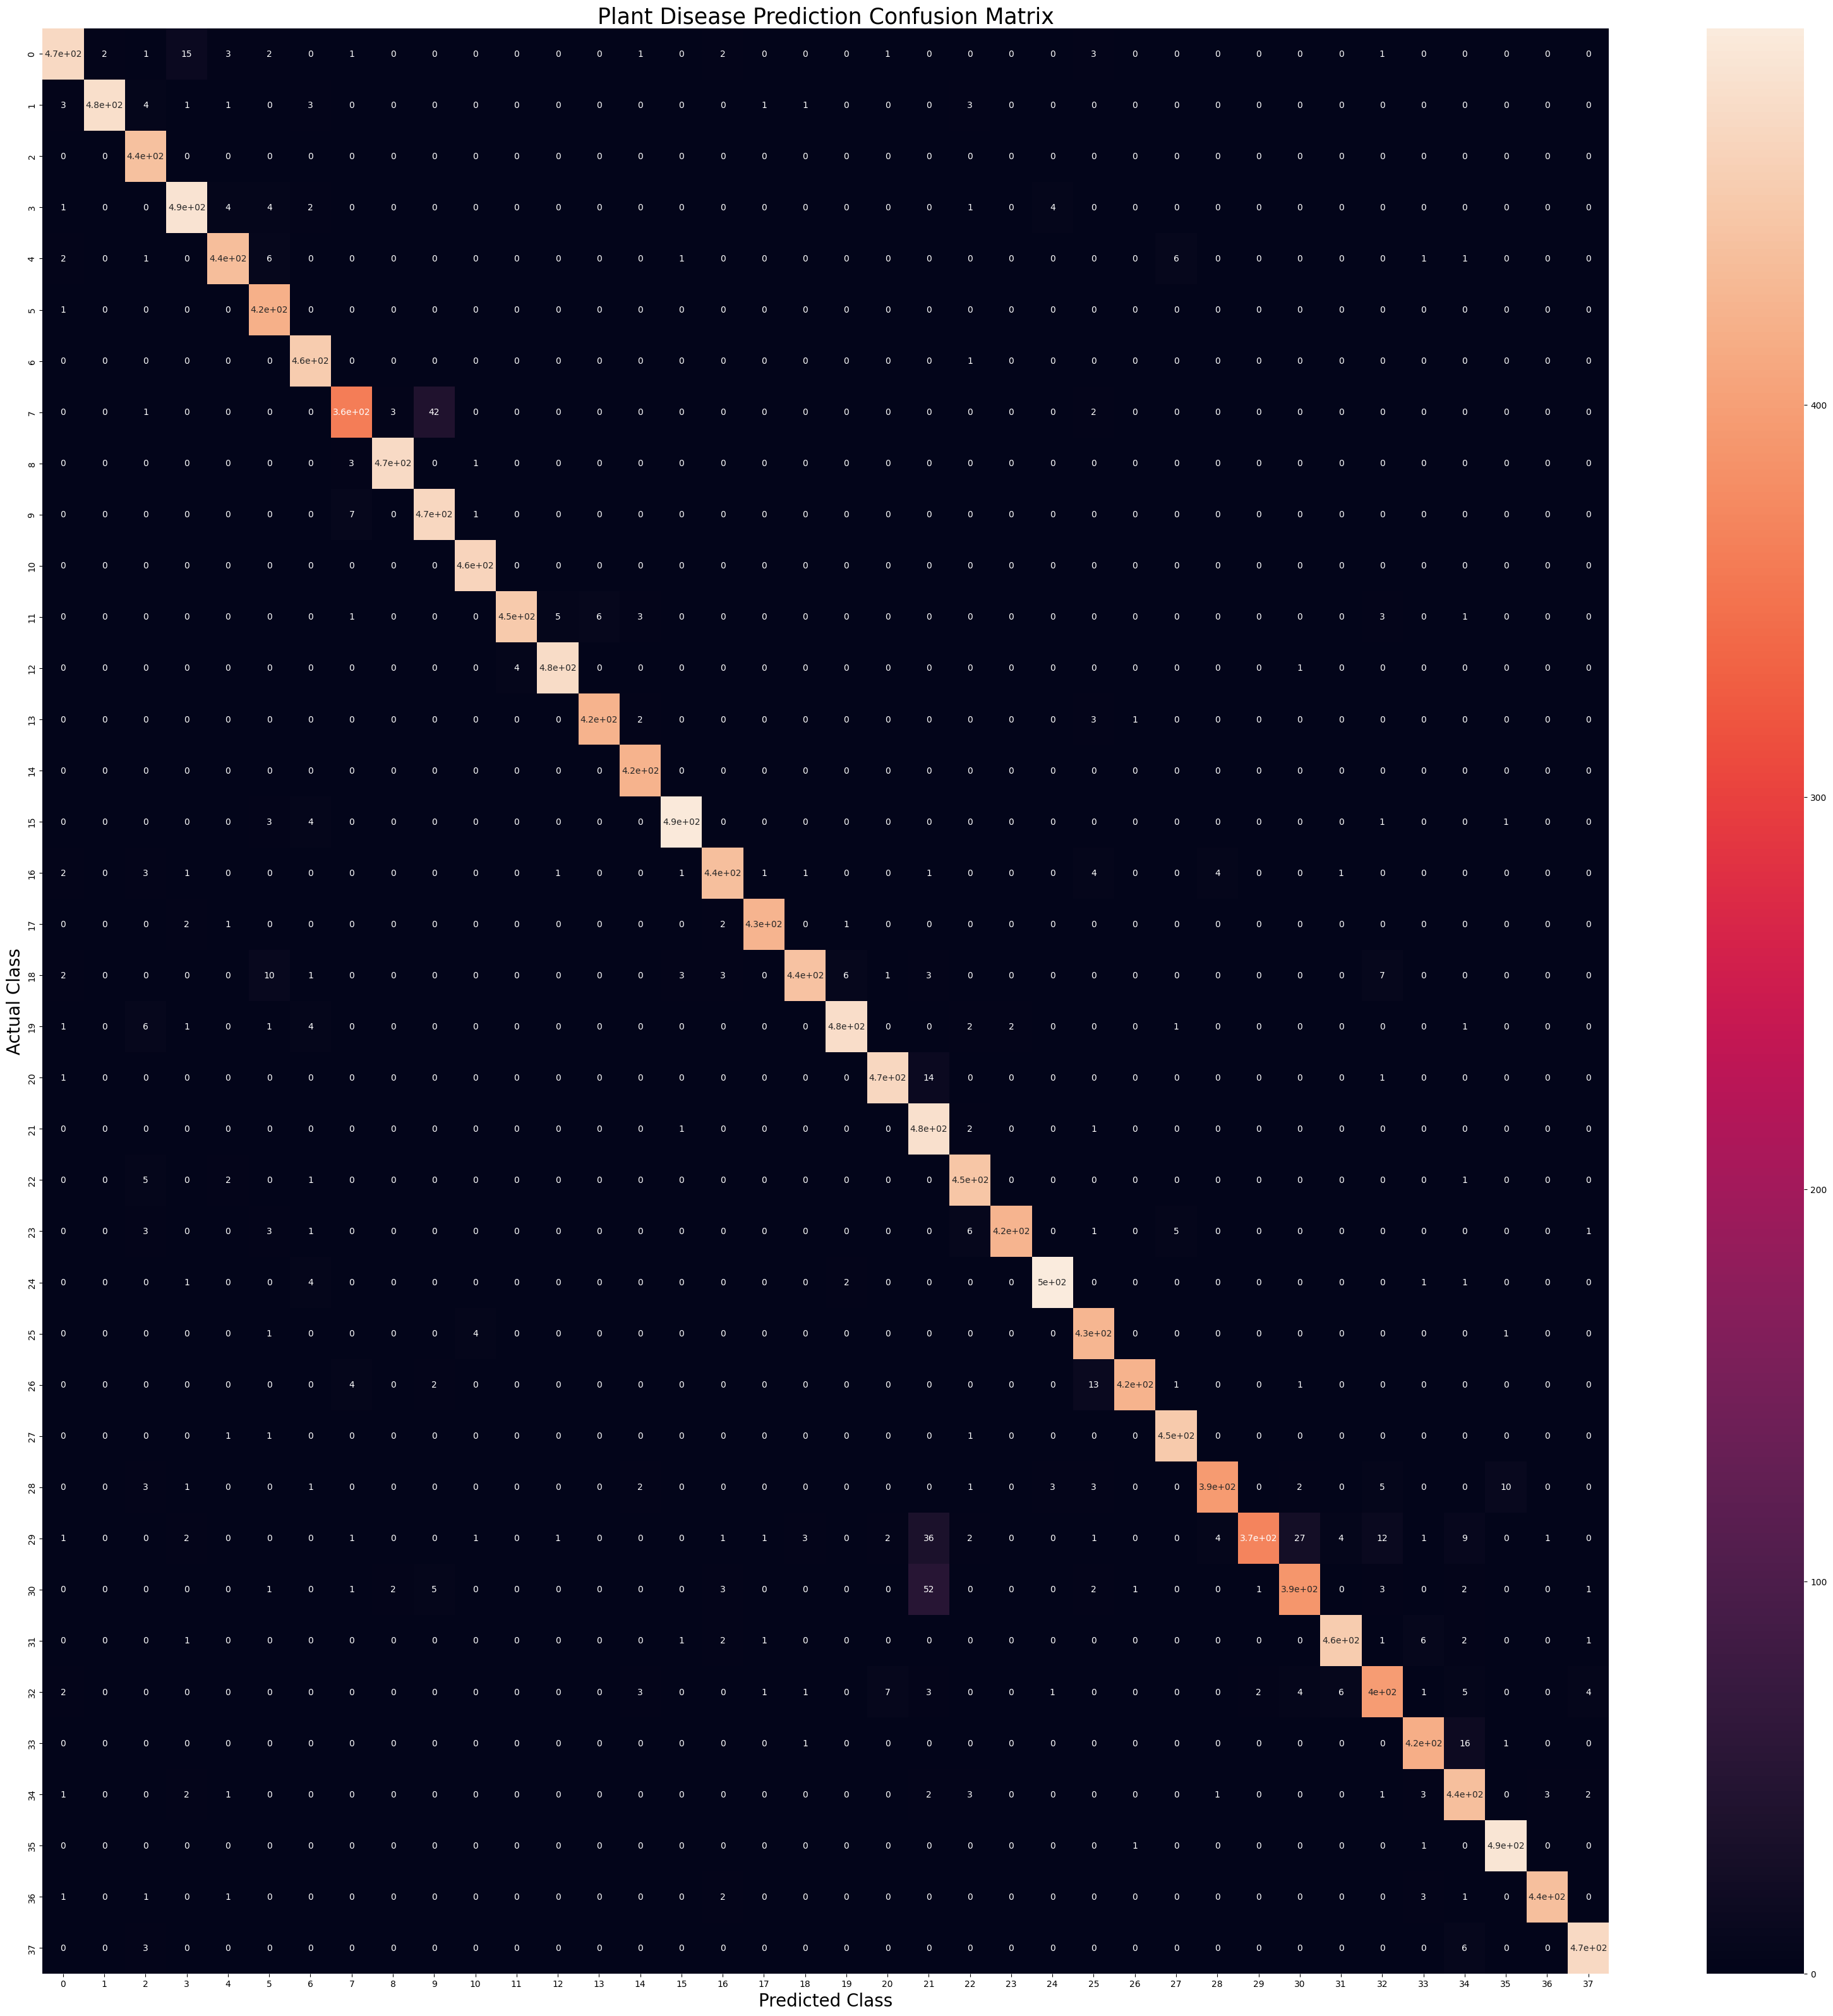

In [43]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()